In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
import math
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax, RMSprop
#from keras.utils.vis_utils import plot_model
from keras.src.utils import plot_model
from livelossplot import PlotLossesKeras
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import gc  # Garbage collector

We willen het geslacht van een Simpson kunnen voorspellen m.b.v. een neuraal netwerk (cfr. hoofdstuk
Beslissingsbomen uit Data Science 1). Deze dataset is erg klein en daarom kunnen we geen validatie-set
of test-set construeren.
a) Lees de dataset (‘The Simpsons original.csv) van de Simpsons in.
b) Wat voor soort voorspelling trachten we hier te doen? Regressie of classificatie?
c) Bepaal welke kolommen we niet kunnen gebruiken bij deze voorspelling?
d) Maak nu een input training data set x_simpsons en normaliseer deze (min-max normalisatie).
Doe hetzelfde voor de outputkolom(y4_simpsons).
e) Maak een neuraal netwerk met de correcte inputs en outputs. Maak een plot van het ANN.
f) Gebruik je neuraal netwerk om het geslacht van je x_simpsons te voorspellen. Komen ze
overeen met de targets? Voorspel ook het geslacht van de onbekende Simpson (Comic guy:
hairlenght=8, weight=500, age=38).. Komt dit overeen met de voorspelling die je gemaakt werd
bij beslissingsbomen (zie Data Science 1)?


In [2]:
# data = pd.read_csv("../oefeningen/DataSets/The Simpsons original.csv")
# mapping={"M":0,"F":1}
# data['gender'] = data['gender'].map(mapping)
# data
# 
# 
# scale = MinMaxScaler()
# x_simps= data[['hair length','weight','age']]
# y_simps = data[['gender']]
# # y_simps = y_simps.replace(to_replace=['M','F'], value=[0,1])
# y_simps= to_categorical(y_simps)
# x_simps_norm = scale.fit_transform(X=x_simps)
# inputs_simpons = Input(shape=(3,))
# x_simp = Dense(6, activation='sigmoid')(inputs_simpons)  
# x_simp = Dense(12, activation='sigmoid')(x_simp)  
# x_simp = Dense(24, activation='sigmoid')(x_simp)
# x_simp = Dense(12, activation='sigmoid')(x_simp)
# x_simp = Dense(6, activation='sigmoid')(x_simp) 
# outputs_xor = Dense(2, activation='sigmoid')(x_simp)
# model_xor = Model(inputs_simpons, outputs_xor, name='XOR_NN')
# 
# model_xor.summary()
# plot_model(model_xor, to_file='model_xor_plot.png', show_shapes=True, show_layer_names=True)
# 
# model_xor.compile(optimizer=Adam(learning_rate=0.001),
#                   loss=keras.losses.binary_crossentropy,
#                   metrics=['accuracy'])
# history_xor = model_xor.fit(x_simps, 
#                             y_simps, epochs=200, 
#                             callbacks=[PlotLossesKeras()], 
#                             verbose=False
#                            )

In [3]:
simpsons = pd.read_csv("../oefeningen/DataSets/The Simpsons original.csv")
# simpsons
y_simp=simpsons['gender']
y_simp = y_simp.replace(["M","F"],[1,0])
# y_simp
x_simp = simpsons[["hair length",'weight','age']]
scaler = MinMaxScaler()
x_simp_norm = scaler.fit_transform(X=x_simp)
inputs_simpons = Input(shape=(3,))
x_ = Dense(6, activation='sigmoid')(inputs_simpons)  
x_ = Dense(12, activation='sigmoid')(x_)  
x_ = Dense(24, activation='sigmoid')(x_)
x_ = Dense(12, activation='sigmoid')(x_)
x_ = Dense(6, activation='sigmoid')(x_) 
outputs_xor = Dense(1, activation='sigmoid')(x_)
model_xor = Model(inputs_simpons, outputs_xor, name='XOR_NN')
model_xor.summary()
plot_model(model_xor, to_file='model_xor_plot.png', show_shapes=True, show_layer_names=True)
model_xor.compile(optimizer=Adam(learning_rate=0.001),
                  loss=keras.losses.binary_crossentropy,
                  metrics=['accuracy'])
history_xor = model_xor.fit(x_simp, 
                            y_simp, epochs=200, 
                            callbacks=[PlotLossesKeras()], 
                            verbose=False
                           )




KeyboardInterrupt: 

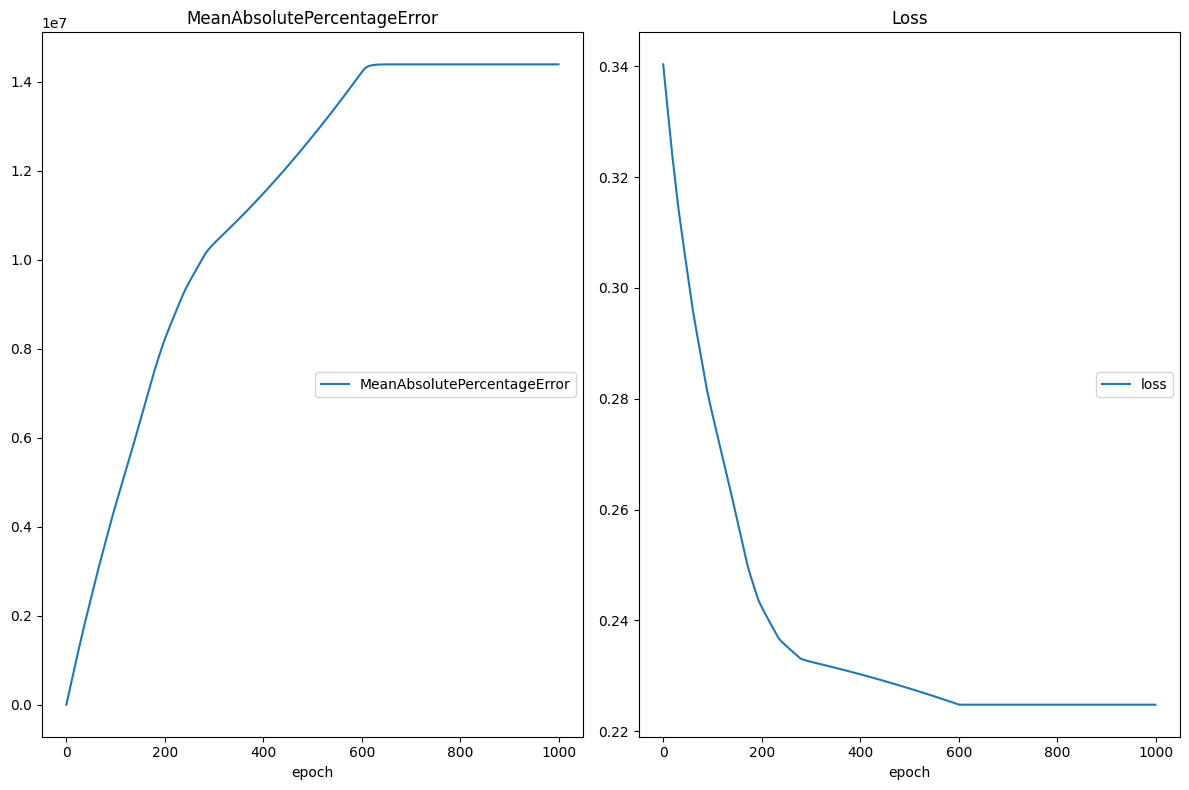

MeanAbsolutePercentageError
	MeanAbsolutePercentageError 	 (min:   95.045, max: 14388976.000, cur: 14388973.000)
Loss
	loss             	 (min:    0.225, max:    0.340, cur:    0.225)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - MeanAbsolutePercentageError: 14388973.0000 - loss: 0.2248
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


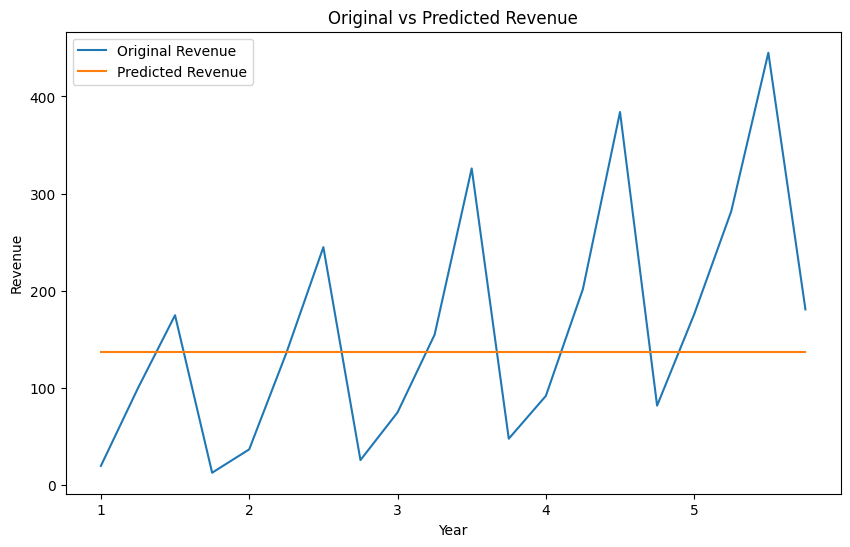

In [7]:
del model_xor
gc.collect()
forcast = pd.read_csv("../oefeningen/DataSets/forcastdemo.csv", sep=";")
forcast
x = forcast[['Year',"Quarter"]]
y= forcast["Revenu"]
scaler = MinMaxScaler()
scaler_y = MinMaxScaler()
x_norm = scaler.fit_transform(X=x)
y_forecast_norm = scaler_y.fit_transform(y.values.reshape(-1, 1))
inputs_ = Input(shape=(2,))
x_ = Dense(4, activation='relu')(inputs_)  
x_ = Dense(8, activation='relu')(x_)  
x_ = Dense(16, activation='relu')(x_)  
x_ = Dense(8, activation='relu')(x_)
x_ = Dense(4, activation='relu')(x_)
x_ = Dense(2, activation='relu')(x_)
outputs_xor = Dense(1, activation='linear')(x_)
model_xor = Model(inputs_, outputs_xor, name='XOR_NN')
model_xor.summary()
plot_model(model_xor, to_file='model_xor_plot.png', show_shapes=True, show_layer_names=True)
model_xor.compile(optimizer=Adam(learning_rate=0.001),
                  loss=keras.losses.MeanAbsoluteError(),
                  metrics=['MeanAbsolutePercentageError'])
history_xor = model_xor.fit(x_norm, 
                            y_forecast_norm,
                            epochs=1000, 
                            callbacks=[PlotLossesKeras()], 
                            verbose=True
                           )
y_forecast_pred_norm = model_xor.predict(x_norm)
y_forecast_pred = scaler_y.inverse_transform(y_forecast_pred_norm)

plt.figure(figsize=(10, 6))
plt.plot(forcast['Year'] + (forcast['Quarter']-1)/4, forcast['Revenu'], label='Original Revenue')
plt.plot(forcast['Year'] + (forcast['Quarter']-1)/4, y_forecast_pred, label='Predicted Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Original vs Predicted Revenue')
plt.legend()
plt.show()


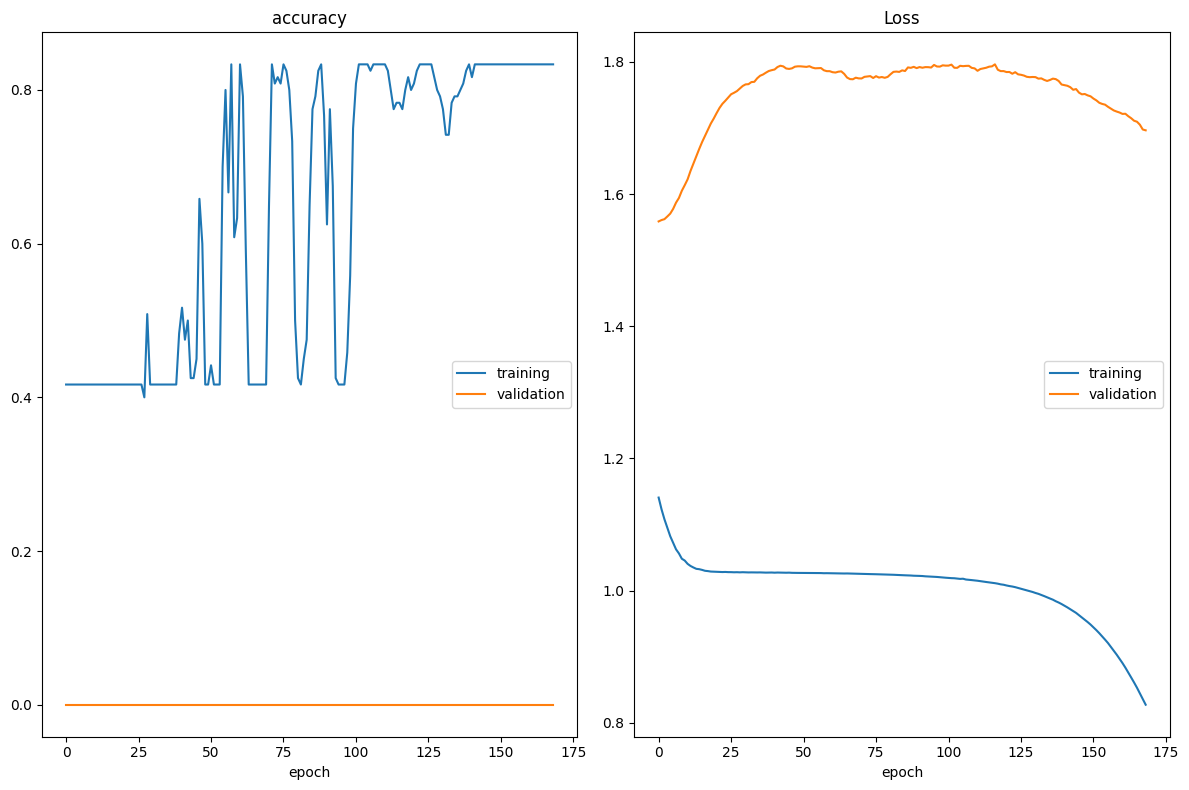

accuracy
	training         	 (min:    0.400, max:    0.833, cur:    0.833)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    0.827, max:    1.141, cur:    0.827)
	validation       	 (min:    1.559, max:    1.796, cur:    1.696)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8625 - loss: 0.8082 - val_accuracy: 0.0000e+00 - val_loss: 1.6964
Epoch 170/1000


KeyboardInterrupt: 

In [5]:
del model_xor
gc.collect()

iris = pd.read_csv('../oefeningen/DataSets/iris.csv')

# Prepare the input and target variables
x = iris[["sepal width", "sepal length", "petal width", "petal length"]]
y = iris["target"]
y = y.replace(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], [0, 1, 2])

# Normalize the input features
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)

# One-hot encode the target variable
y_encoded = to_categorical(y, num_classes=3)

# Define the model
inputs_ = Input(shape=(4,))
x_ = Dense(4, activation='sigmoid')(inputs_)
x_ = Dense(8, activation='sigmoid')(x_)
x_ = Dense(16, activation='sigmoid')(x_)
x_ = Dense(8, activation='sigmoid')(x_)
outputs_xor = Dense(3, activation='softmax')(x_)
model_xor = Model(inputs_, outputs_xor, name='XOR_NN')

# Compile the model
model_xor.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


# Train the model with validation and callbacks
history_xor = model_xor.fit(x_norm, y_encoded,
                            validation_split=0.2,
                            epochs=1000,
                            callbacks=[PlotLossesKeras()],
                            verbose=True)




In [ ]:
iris.target.unique()